# Sensitivity of results for cost factor water transport

## Relative errors mean annual fluxes


In [6]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


No handles with labels found to put in legend.


<Figure size 1280x400 with 0 Axes>

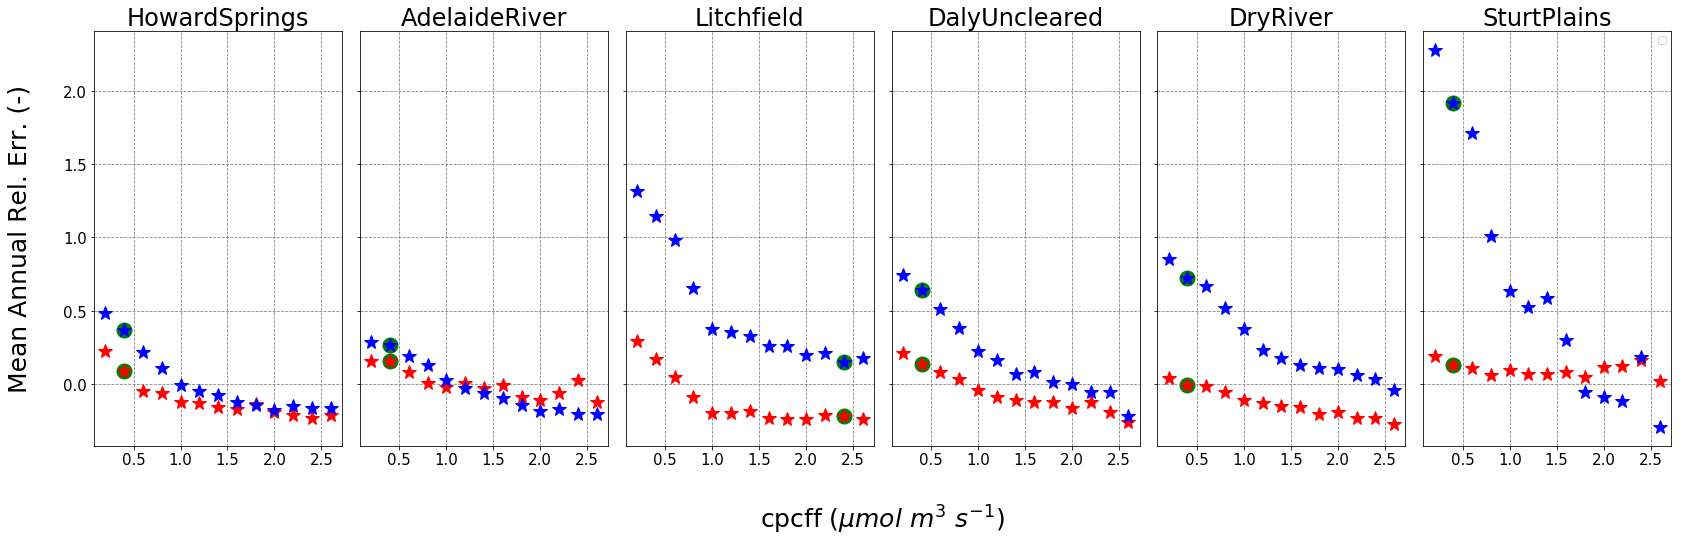

Missing files:  0


In [2]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=6, figsize=(24, 8), sharex=True, sharey=True)   


i = 0

skipped = 0
#loop over all sites
for site in study_sites:
  
    
    loc = 1
    i_cpcff = 0
    NCPmax = 0
    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt") #mm/d        

            infile = ["../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_best/results_daily.txt"]
            #get NCP-value
            data = np.genfromtxt(infile[0], names=True)
            
            if( (np.sum(data["ncp_g"]) + np.sum(data["ncp_g"])) > NCPmax ):
                NCPmax = np.sum(data["ncp_g"]) + np.sum(data["ncp_g"])
                cpcff_ncpmax = cpcff_vals[i_cpcff]
                reass_ncpmax = assbest_stats[1]
                ree_ncpmax = ebest_stats[1]
                
            if(loc  == 1):
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1], '*r', markersize=15, label="evaporation" ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1], '*b', markersize=15, label="assimilation" ) 
            else:
                box1 = ax[i].plot(cpcff_vals[i_cpcff], ebest_stats[1], '*r', markersize=15 ) 
                ax[i].plot(cpcff_vals[i_cpcff], assbest_stats[1], '*b', markersize=15 ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")

       
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
        
    ax[i].set_title(site, size=24  )

    #plot solutions with highest NCP-value
    ax[i].plot(cpcff_ncpmax, reass_ncpmax, 'o', color = "green", markersize=15, label="Max. NCP", zorder=0 ) 
    ax[i].plot(cpcff_ncpmax, ree_ncpmax, 'o', color = "green", markersize=15, zorder=0) 
  
    ax[i].grid(b=True, which='major', color='grey', linestyle='--')

    for tick in ax[i].xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    for tick in ax[i].yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    i = i +1


fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.ylabel('Mean Annual Rel. Err. (-)', size = 25, labelpad=40)

plt.legend()
plt.tight_layout()
plt.show()

    
print("Missing files: ", + skipped)

The relative errors seem to go down for higher values of the costfactor in most cases. The smallest relative error seem to be between 0.6 and 1.2 $\mu mol m^3 s^{-1}$. At least, for most study sites several values approach zero, or change sign and cross the zero-axis. SturtPlains still shows a large offset for the assimilation. 

## Optimal costfactor
The minimum mean annual relative error should correspond to the most optimal value of the costfactor for water transport


<Figure size 1280x400 with 0 Axes>

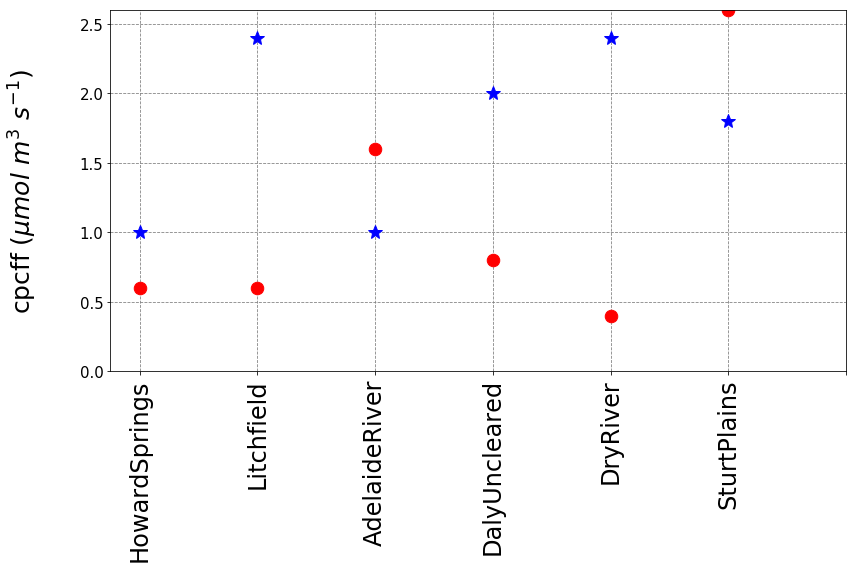

Missing files:  0


In [3]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "Litchfield", "AdelaideRiver",  "DalyUncleared", "DryRiver", "SturtPlains" ]

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)


fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=1, figsize=(12, 8), sharex=True, sharey=True)   

loc = 1
skipped = 0
#loop over all sites
for site in study_sites:
  
    REe = np.zeros((13))
    REass = np.zeros((13))
    REe[:] = np.nan
    REass[:] = np.nan
    
    i = 0
    #loop over all cpcff-values for the free-draining case
    for cpcff in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + cpcff + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + cpcff + "/sce_stats_best/ass_beststats.txt") #mm/d        

            REe[i] = ebest_stats[1]
            REass[i] = assbest_stats[1]
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + cpcff + "/sce_stats_best/ass_beststats.txt')")
        i = i + 1
    
    cpcff_opte = cpcff_vals[abs(REe) == np.nanmin(abs(REe))]
    cpcff_optass = cpcff_vals[abs(REass) == np.nanmin(abs(REass))]

    ax.plot(loc, cpcff_opte, '.r', markersize=25, label="evaporation" ) 
    ax.plot(loc, cpcff_optass, '*b', markersize=15, label="assimilation" ) 
     
    ax.set_ylim([0, 2.6])    
    #ax[i].set_xlim([0.5, loc-0.5])    
    ax.grid(b=True, which='major', color='grey', linestyle='--')
 
    ax.set_xticks( np.arange(1,8)  )  
    #ax[i].set_xticks( np.arange(1.5,29.5, 2), minor=True )  
    
    ax.set_xticklabels( study_sites, rotation=90, fontsize = 24 )  
    #ax.set_xticklabels( "" )  
    #ax[i].text(x=1, y=-1.93, s="Free draining", fontsize=20, rotation = 90, verticalalignment='bottom')
    #ax[i].text(x=0.5*loc+1, y=-1.93, s="Dynamic water table", fontsize=20, rotation = 90, verticalalignment='bottom')

    for tick in ax.xaxis.get_minor_ticks():
        tick.label.set_fontsize(15)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)
    loc = loc + 1

#fig.add_subplot(111, frameon=False)
#plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size = 25, labelpad=40)
plt.xlabel('', size = 25, labelpad=40)

plt.tight_layout()
plt.show()
    
print("Missing files: ", + skipped)

The most optimal values, i.e. the cpcff-value with smallest relative error, still varies considerably between the study sites. Hence, even though the range is now extended, we cannot draw conclusions on what value it should have.

## Timeseries of evaporation

/home/remko/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


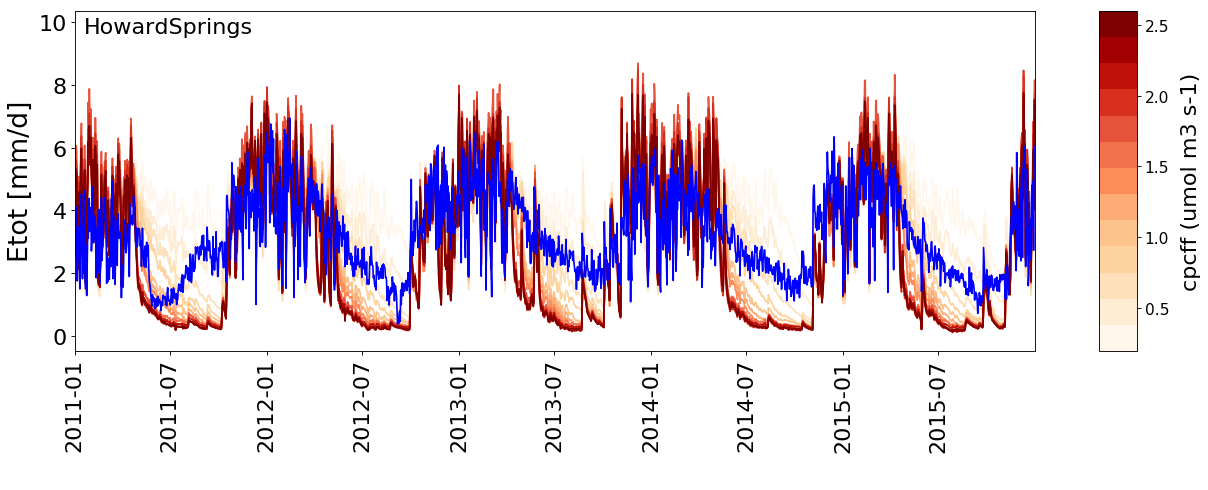

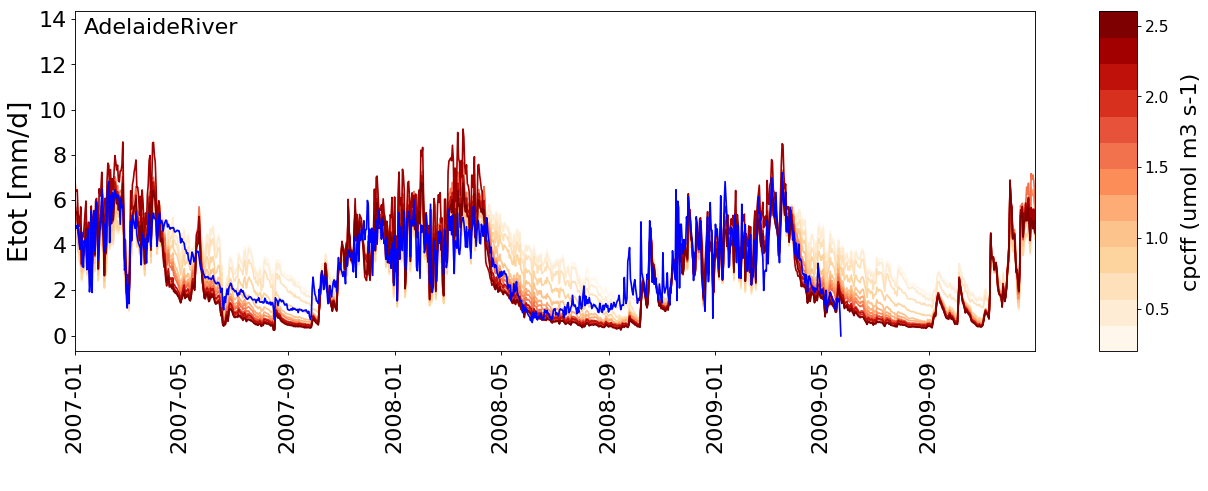

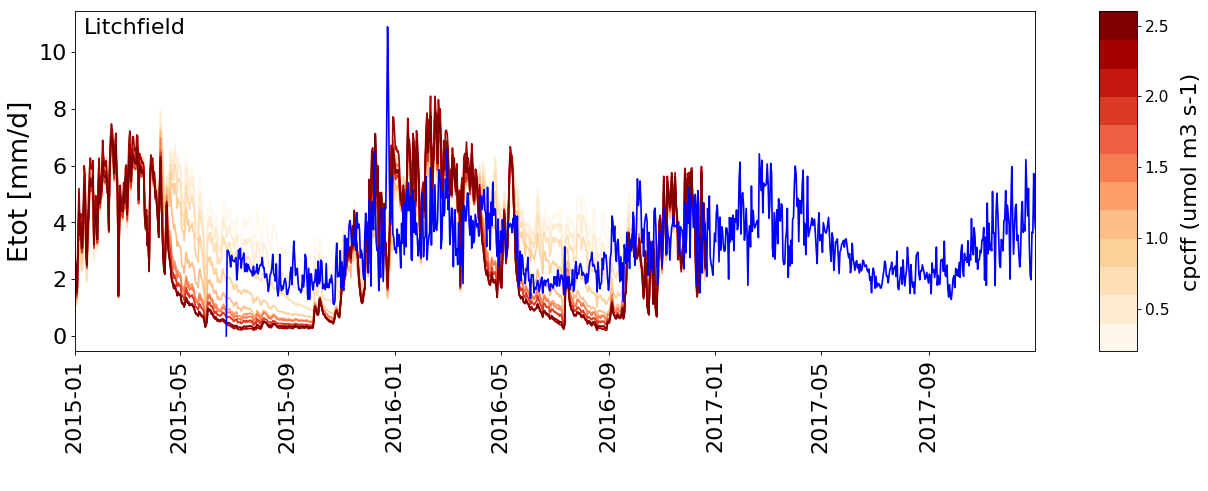

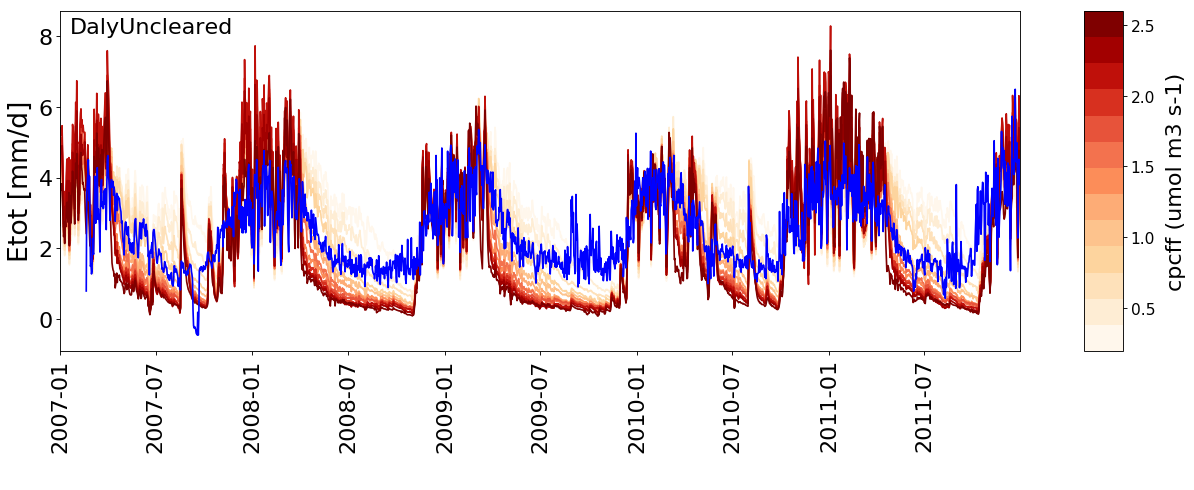

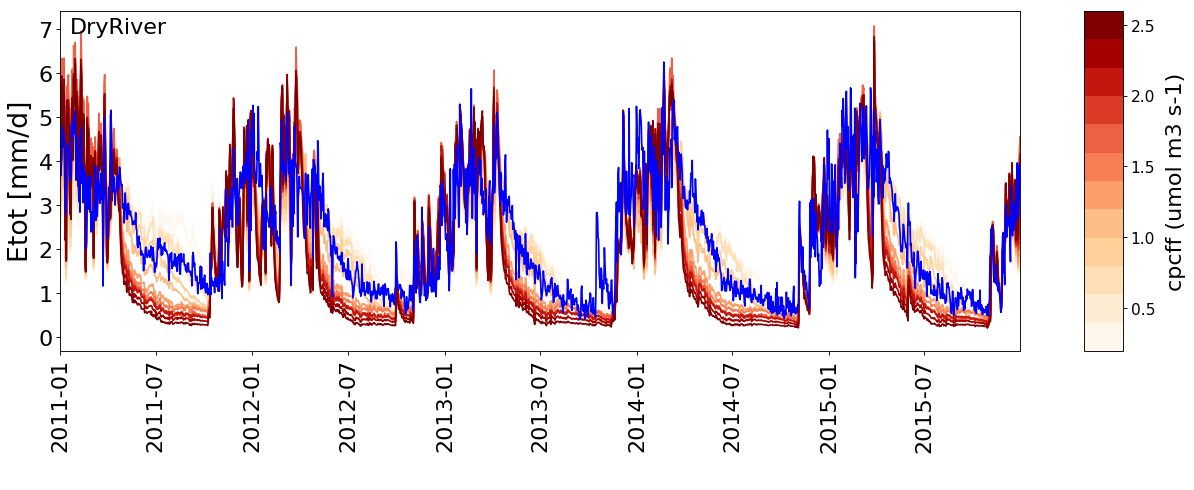

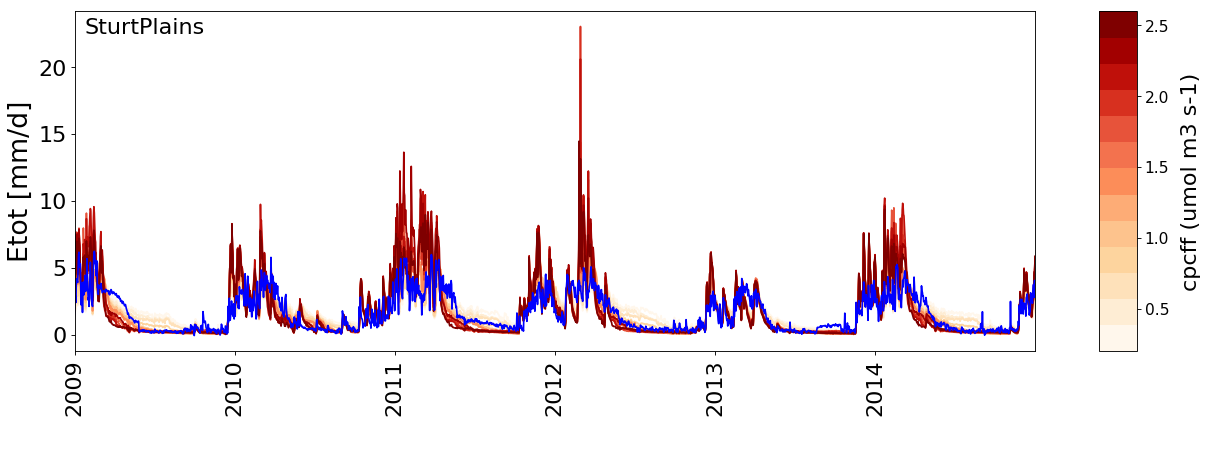

In [4]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "HowardSprings"


#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_adelaide.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "AdelaideRiver"

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/Ea_litch.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "Litchfield"

#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/Ea_daly.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DalyUncleared"

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/Ea_dry.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DryRiver"

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/Ea_sturt.txt --mf 1000 --ylabel "Etot [mm/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "SturtPlains"


The timeseries of total evaporation show a reasonable fit for most values of the cost factor (colored from light yellow to darkred) with the observations (blue), similar as the plots of relative errors suggest. Best results seem to be in the mid-range of the values. 

During wet-season, hardly any differences for the different cpcff-values.

## Timeseries of assimilation

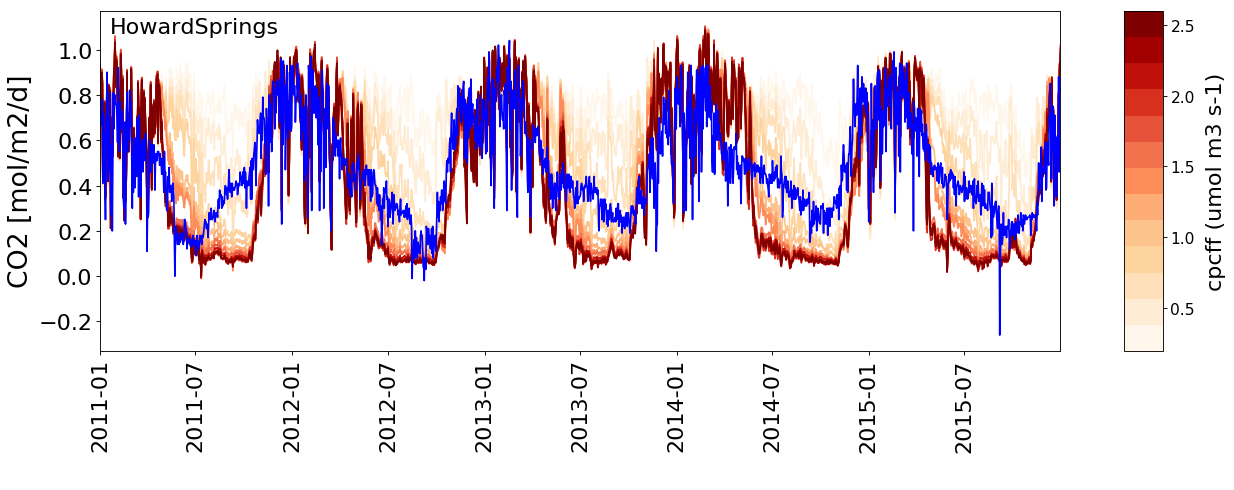

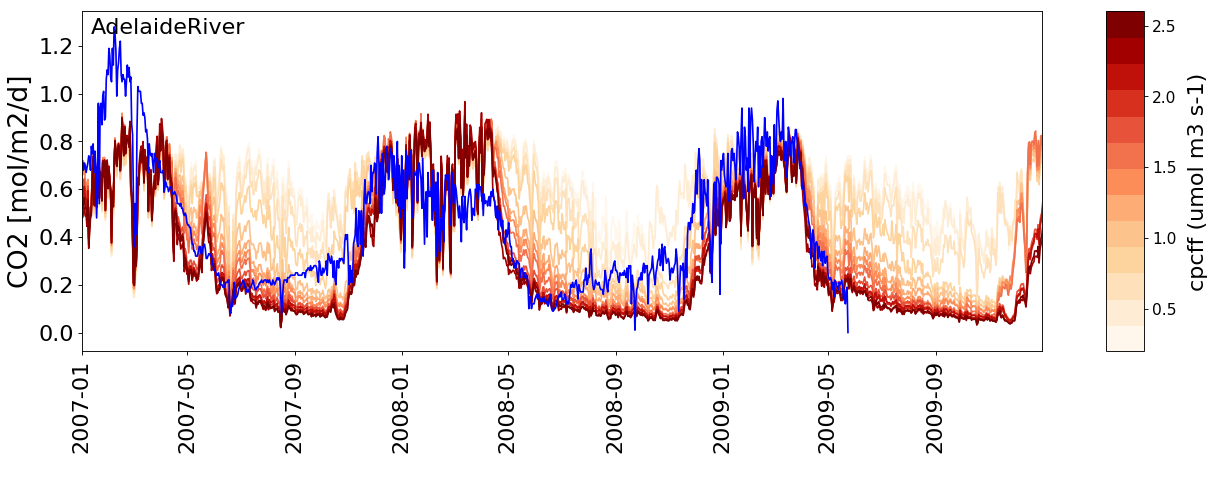

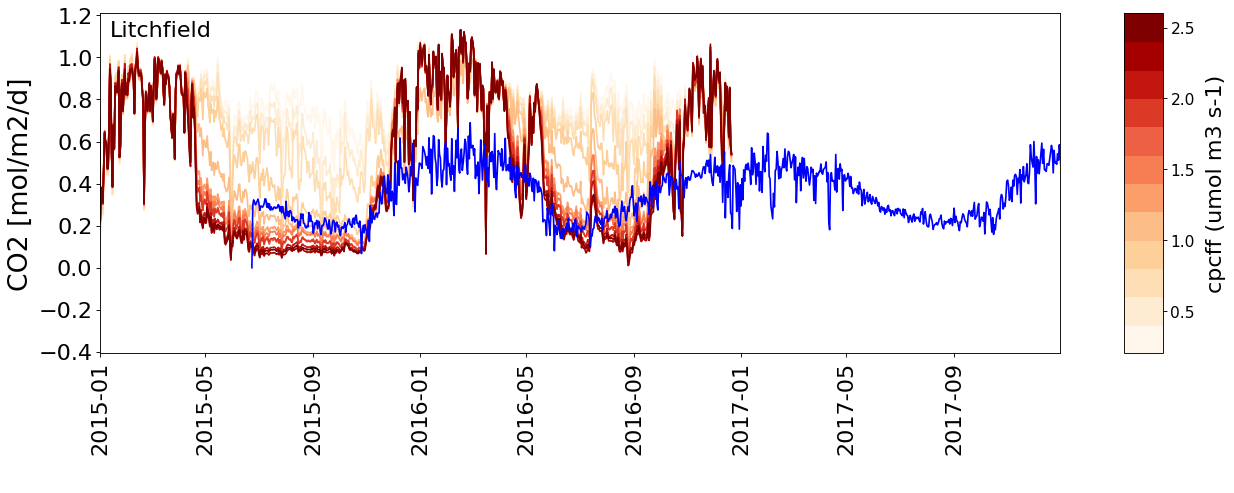

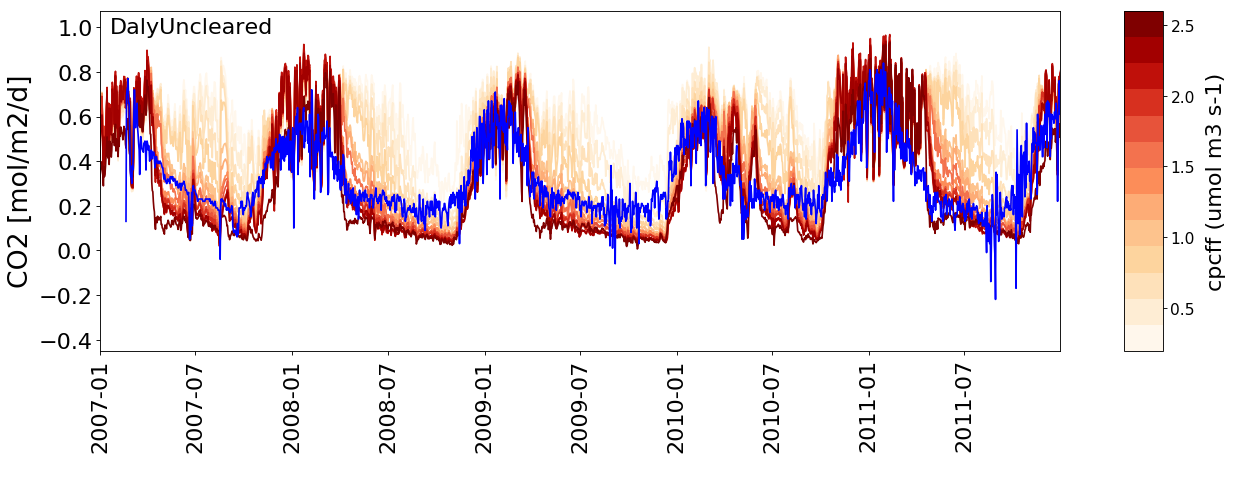

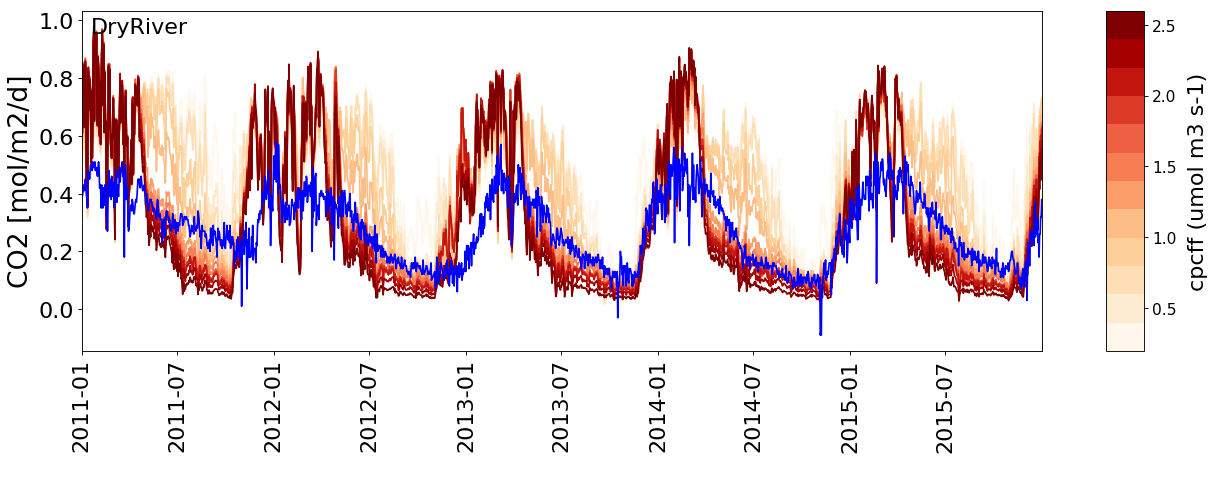

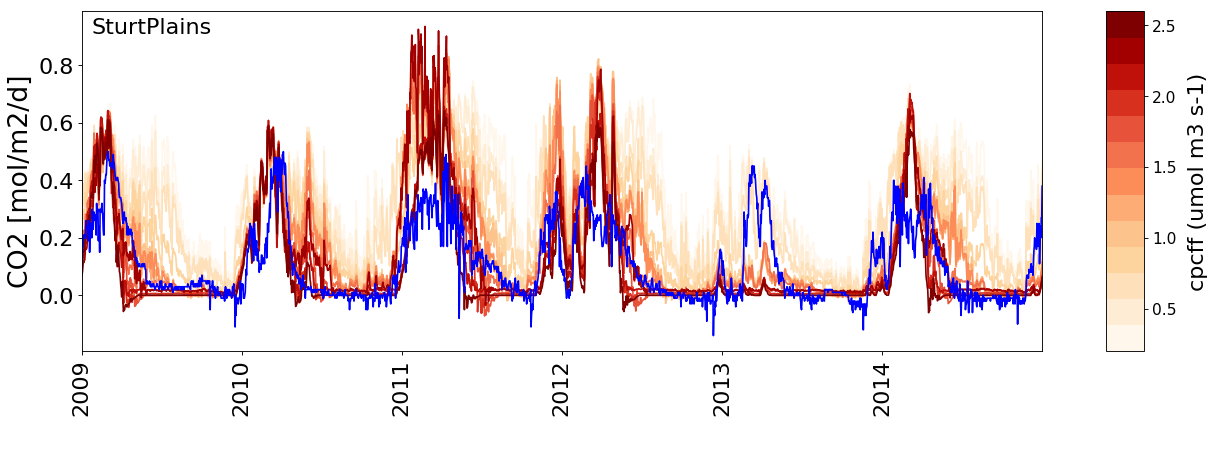

In [5]:


#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "HowardSprings"

#AdelaideRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2009 -w ../../data/VOM_input/AdelaideRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_adelaide.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "AdelaideRiver"

#Litchfield
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2015 -ye 2017 -w ../../data/VOM_input/Litchfield/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_litch.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "Litchfield"


#DalyUncleared
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_daly.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DalyUncleared"

#DryRiver
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v evaptot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
-v asstot -ys 2011 -ye 2015 -w ../../data/VOM_input/DryRiver/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_dry.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DryRiver"

#SturtPlains
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2009 -ye 2014 -w ../../data/VOM_input/SturtPlains/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_sturt.txt --mf_obs -1 --ylabel "CO2 [mol/m2/d]" \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "SturtPlains"


The timeseries of total assimilation show a reasonable fit for most values of the cost factor (colored from light yellow to darkred) with the observations (blue). Best results seem to be in the mid-range of the values. However, strong off-sets can be observed for several cases of the DryRiver (5th plot), where values approach zero. SturtPlains still shows a large bias too. 

## Timeseries of vegetation cover

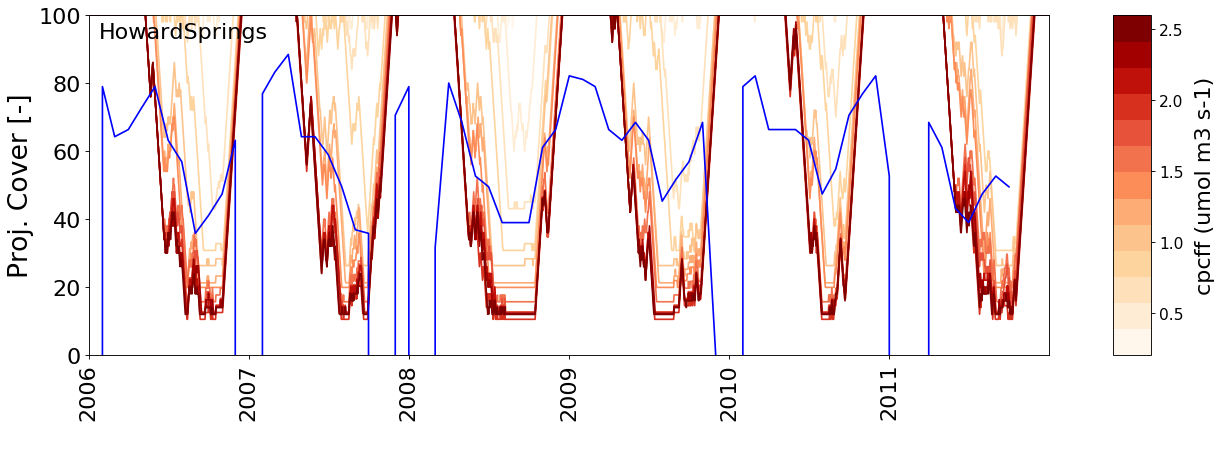

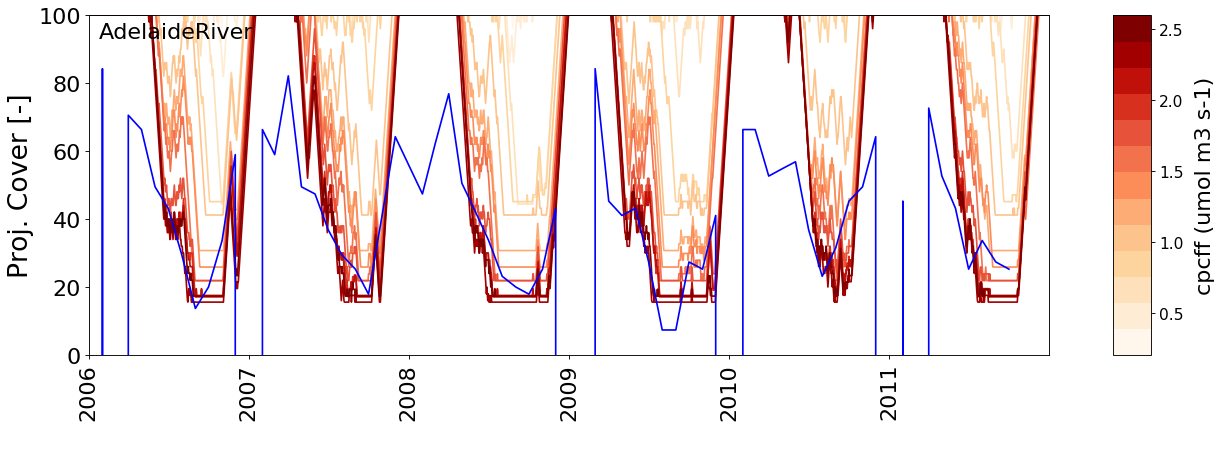

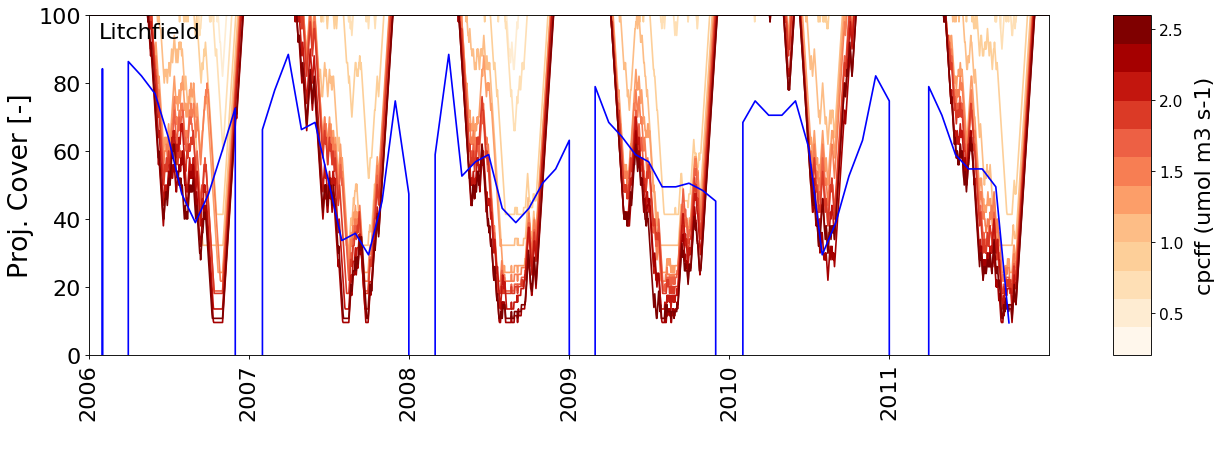

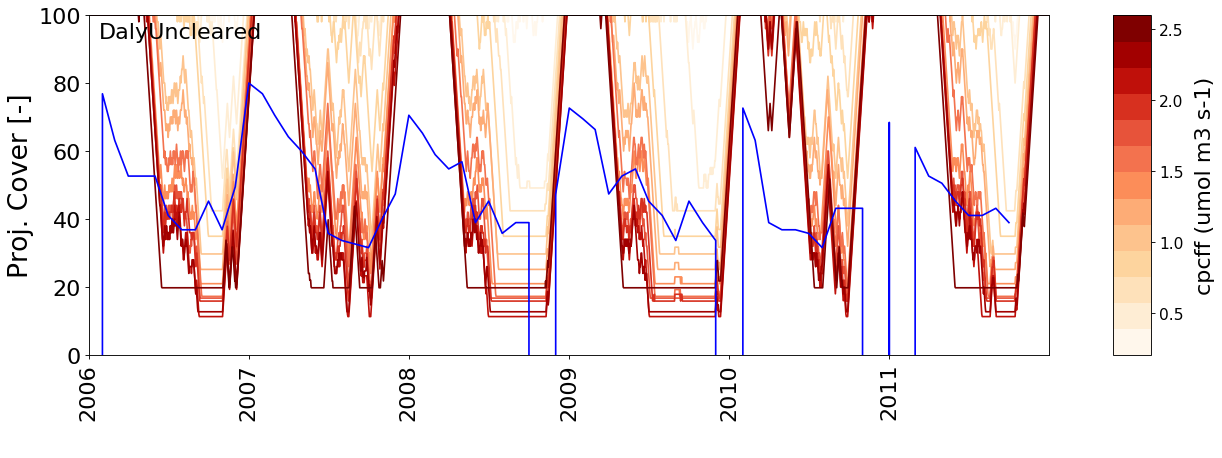

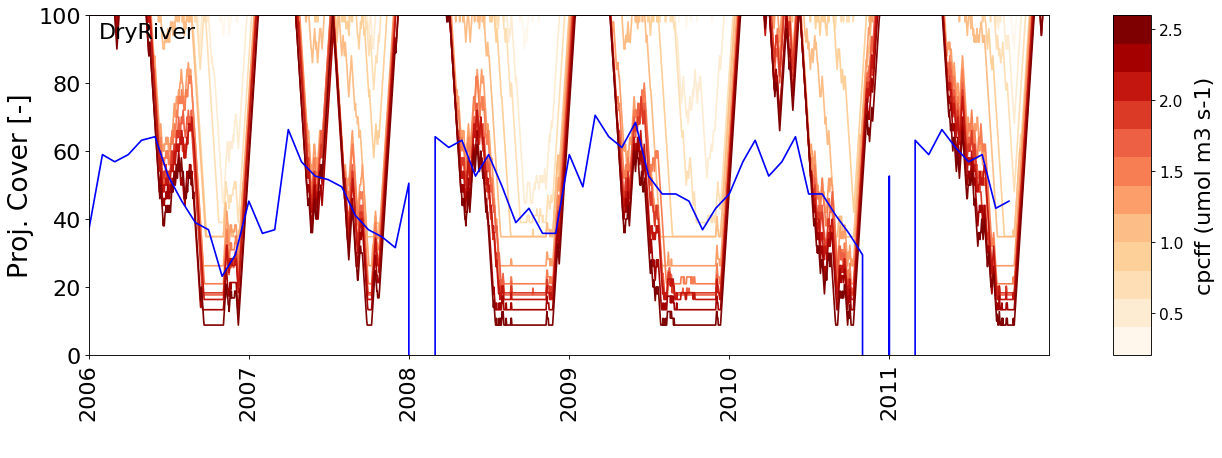

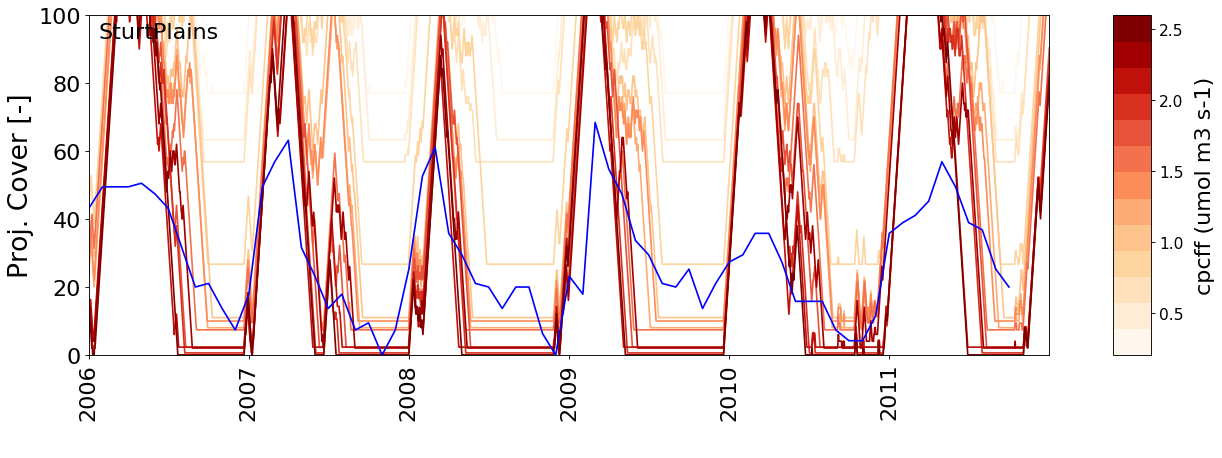

In [6]:
#HowardSprings
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_howard_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "HowardSprings"

#AdelaideRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/AdelaideRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_adelaide_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "AdelaideRiver"


#Litchfield
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/Litchfield/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/Litchfield/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_litchfield_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "Litchfield"

#DalyUncleared
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DalyUncleared/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_daly_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DalyUncleared"

#DryRiver
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/DryRiver/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/DryRiver/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_dry_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "DryRiver"

#SturtPlains
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/SturtPlains/freedrainage_cpcff0.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff0.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.6/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff1.8/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.0/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.2/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.4/sce_best/results_daily.txt \
../../data/VOM_output/SturtPlains/freedrainage_cpcff2.6/sce_best/results_daily.txt \
-v asstot -ys 2007 -ye 2011 -w ../../data/VOM_input/DalyUncleared/dailyweather.prn \
-v pc -ys 2006 -ye 2011 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_sturt_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [-]" --mf 100 \
--plot_cbar True --cblabel "cpcff (umol m3 s-1)" --labels VOM VOM2 \
--title "SturtPlains"


## Parameter values

file not found
file not found
file not found
file not found
file not found
file not found


<Figure size 1280x400 with 0 Axes>

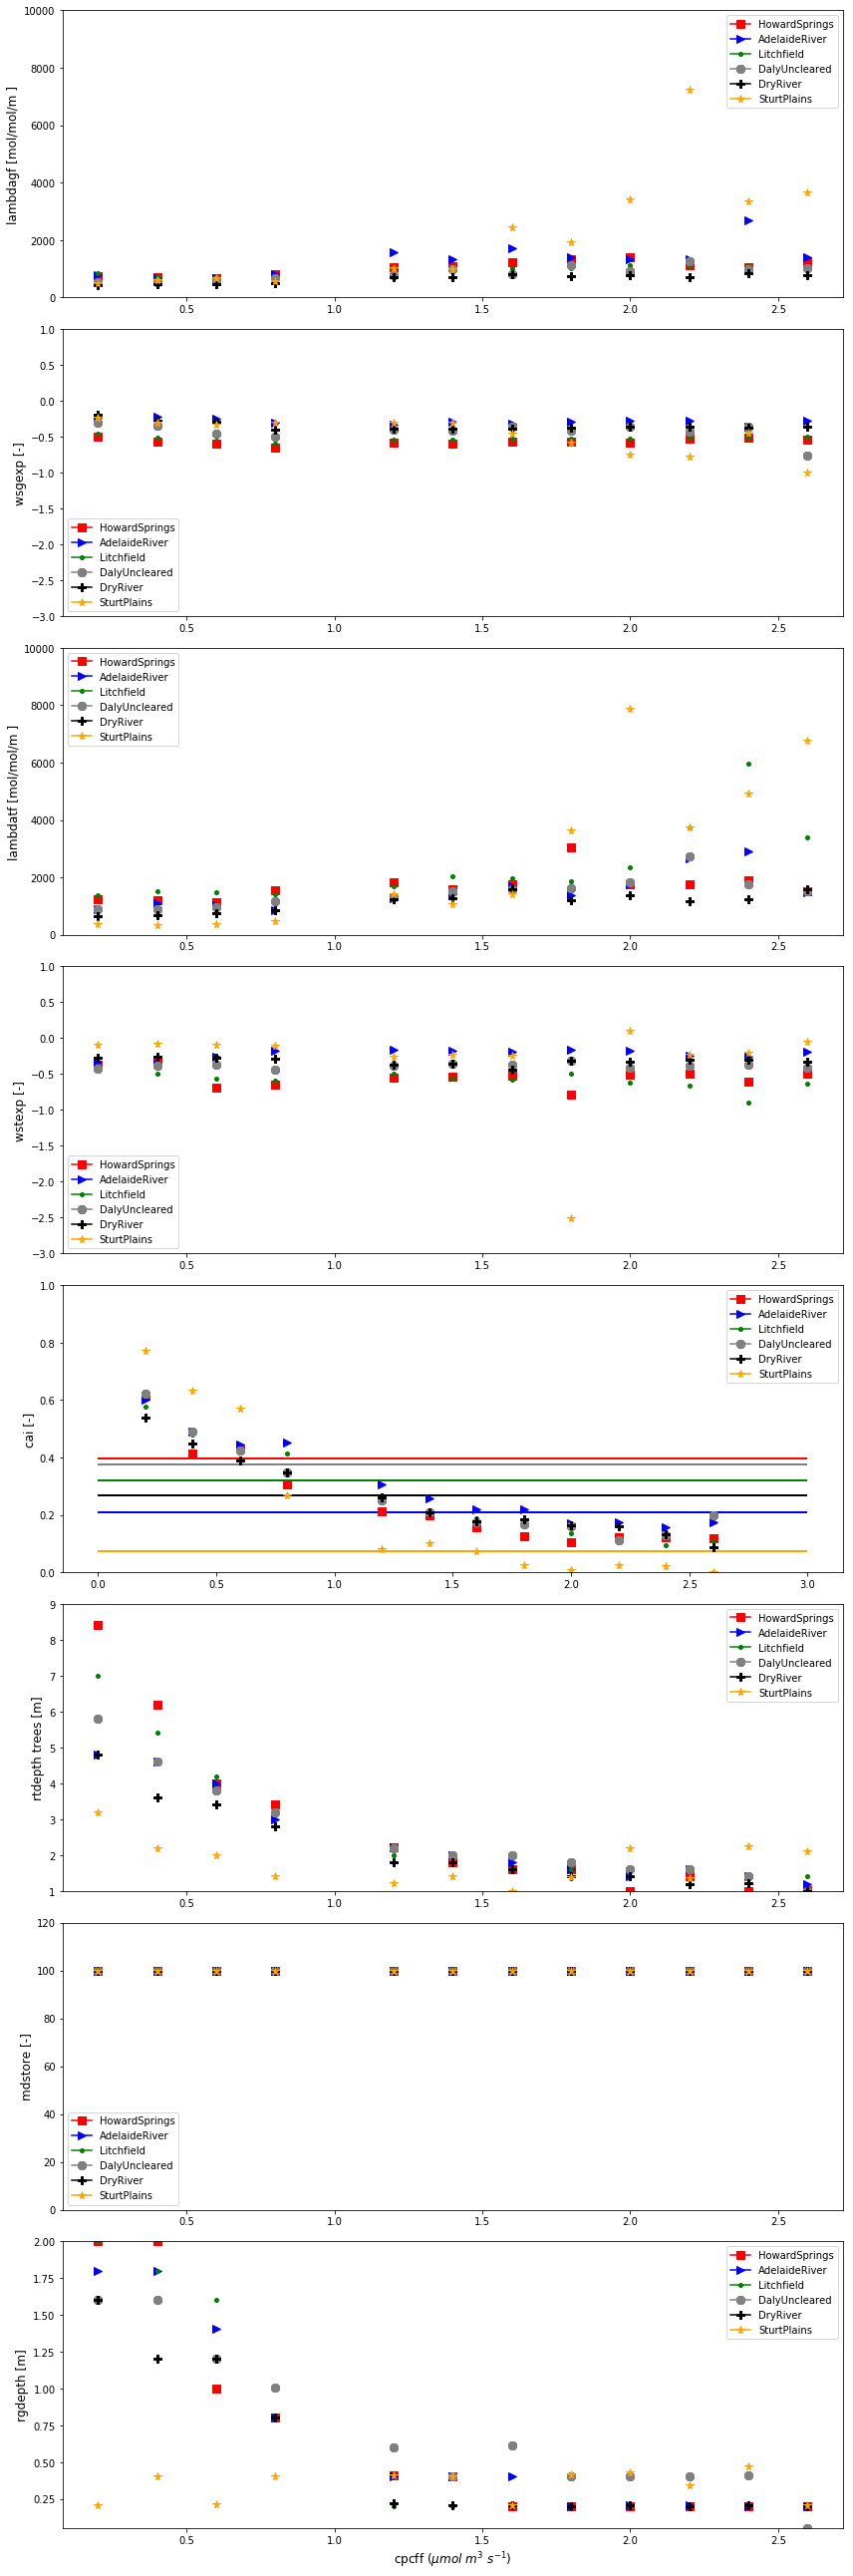

In [7]:
#plot parameters
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 


symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(12, 36)) 


i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            if(cpcff == "1.0"):
                params = np.loadtxt("../../data/VOM_output/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/sce_best/pars.txt")
            else:
                params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/best/input/pars.txt")
            
        #params_nofree = np.loadtxt("../../data/VOM_output/"+  site  +"/nofreedrainage_cpcff" + cpcff_str[i_cpcff] +
        #          "/sce_best/pars.txt")

            for i in range(0,8):
                if(i_cpcff ==0):
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
                else:
                    ax[i].plot(cpcff_vals[i_cpcff], params[i], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                if(i == 4):
                    ax[i].hlines( cai_fpar[ibasin], 0, 3, color = colors[ibasin] )

                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
    
ax[0].set_ylabel("lambdagf [mol/mol/m ]", size=12 )  
ax[0].set_ylim( 0, 10000  )    
ax[0].legend(prop={'size':10})

ax[1].set_ylabel("wsgexp [-]", size=12 )  
ax[1].set_ylim( -3, 1  )    
ax[1].legend(prop={'size':10})

ax[2].set_ylabel("lambdatf [mol/mol/m ]", size=12 )
ax[2].set_ylim( 0, 10000  )    
ax[2].legend(prop={'size':10})

ax[3].set_ylabel("wstexp [-]", size=12 ) 
ax[3].set_ylim( -3, 1  )    
ax[3].legend(prop={'size':10})


ax[4].set_ylabel("cai [-]", size=12 )  
ax[4].set_ylim( 0, 1  )    
ax[4].legend(prop={'size':10})

ax[5].set_ylabel("rtdepth trees [m]", size=12 )  
ax[5].set_ylim( 1, 9  )    
ax[5].legend(prop={'size':10})

ax[6].set_ylabel("mdstore [-]", size=12 )  
ax[6].set_ylim( 0, 120  )    
ax[6].legend(prop={'size':10})

ax[7].set_ylabel("rgdepth [m]", size=12 )  
ax[7].set_xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size=12 )  
ax[7].set_ylim( 0.05, 2  )    
ax[7].legend(prop={'size':10})

plt.tight_layout()
    
plt.show()




Optimal vegetation parameters for the different values of the water transport cost factor cpcff. The lines for the parameter CAI indicate the minimum vegetation cover during the dry season derived from fPar-values. In this way, it can be seen that values around 1.0 $\mu mol/m^3/s$ reproduce best the vegetation cover (HowardSprings = 0.8 $\mu mol/m^3/s$, AdelaideRiver =  1.4 $\mu mol/m^3/s$, Litchfield =  1.0 $\mu mol/m^3/s$, DalyUncleared =  1.0 $\mu mol/m^3/s$, DryRiver =  0.8 $\mu mol/m^3/s$, SturtPlains =  2.6 $\mu mol/m^3/s$).

No handles with labels found to put in legend.


<Figure size 1280x400 with 0 Axes>

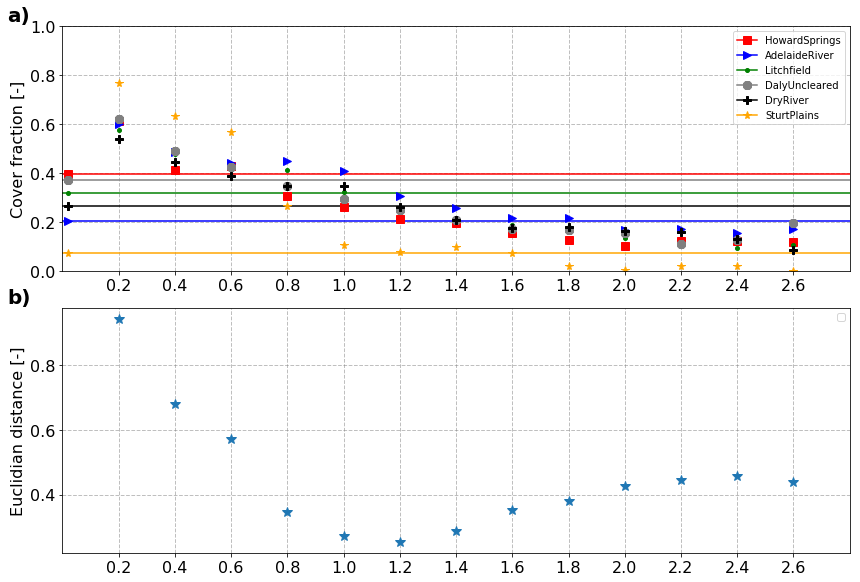

In [14]:
#plot parameters
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8)) 



i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/best/input/pars.txt")

            cai = params[4]
                
            err[i_cpcff, ibasin] = cai - cai_fpar[ibasin]
                          
            if(i_cpcff ==0):
                ax[0].plot(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
                ax[0].plot(0.02, cai_fpar[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                ax[0].hlines( cai_fpar[ibasin], 0, 3, color = colors[ibasin] )
            else:
                ax[0].plot(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     

                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
    

ax[0].set_ylabel("Cover fraction [-]", size=16 )  
ax[0].set_ylim( 0, 1  ) 
ax[0].set_xlim( 0, 2.8  )    

ax[0].legend(prop={'size':10})

ax[0].text(-0.07, 1.02, "a)", transform=ax[0].transAxes, 
            size=20, weight='bold')
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].set_xticks(cpcff_vals)
ax[0].set_xticklabels(cpcff_str)
ax[0].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

#combining the errors
for i_cpcff in range(len(cpcff_str)):
    ED[i_cpcff] = np.sqrt(np.sum(err[i_cpcff,:]**2))

ax[1].plot(cpcff_vals, ED, "*", markersize=10)
ax[1].set_ylabel("Euclidian distance [-]", size = 16 )  
#ax[1].set_ylim( 1, 9  )
ax[1].set_xlim( 0, 2.8  )    

ax[1].legend(prop={'size':10})
ax[1].text(-0.07, 1.02, "b)", transform=ax[1].transAxes, 
            size=20, weight='bold')
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].set_xticks(cpcff_vals)
ax[1].set_xticklabels(cpcff_str)
ax[1].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.tight_layout()
    
plt.show()




Costfactor for the watertransport system (cpcff) versus the percentage vegetation cover in the dry season, with a) modelled fraction of vegetation cover (symbols) and the observed fraction of observation cover based on fPar-data (Donohue et al.,2009) and b) Euclidean distance based on all six study sites between observed and modelled vegetation fractions for each cpcff-value.

<Figure size 1280x400 with 0 Axes>

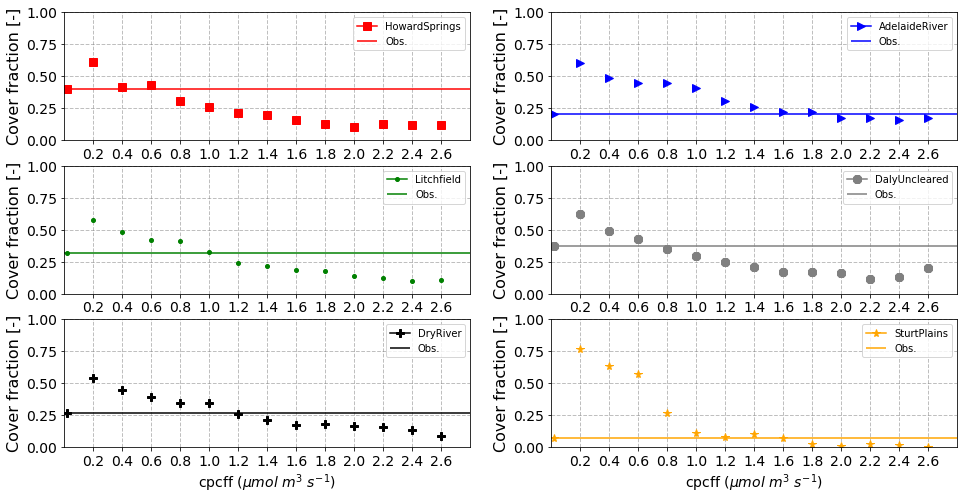

In [9]:
#plot parameters
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 8)) 
ax = axes.flat


i_cpcff = 0
for cpcff in  cpcff_str:  
    ibasin = 0

    for site in study_sites:
        try:
            params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/best/input/pars.txt")

            cai = params[4]
                
            err[i_cpcff, ibasin] = cai - cai_fpar[ibasin]
                          
            if(i_cpcff ==0):
                ax[ibasin].plot(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
                ax[ibasin].plot(0.02, cai_fpar[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     
                ax[ibasin].hlines( cai_fpar[ibasin], 0, 3, color = colors[ibasin],label = "Obs." )
            else:
                ax[ibasin].plot(cpcff_vals[i_cpcff], cai, marker=symbols[ibasin], color=colors[ibasin] , markersize=8)     

                
            ax[ibasin].set_ylabel("Cover fraction [-]", size=16 )  
            ax[ibasin].set_ylim( 0, 1  ) 
            ax[ibasin].set_xlim( 0, 2.8  )    

            ax[ibasin].legend(prop={'size':10})
            if(ibasin > 3):
                #ax[ibasin].set_xlabel("cpcff [-]", size=16 )  
                ax[ibasin].set_xlabel(r'cpcff ($\mu$$mol$ $m^3$ $s^{-1}$)', size=14 )  

            
            #ax[0].text(-0.07, 1.02, "a)", transform=ax[0].transAxes, 
            #            size=20, weight='bold')
            ax[ibasin].tick_params(axis='both', which='major', labelsize=14)
            ax[ibasin].set_xticks(cpcff_vals)
            ax[ibasin].set_xticklabels(cpcff_str)
            ax[ibasin].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)

                
                
        except OSError:
            print('file not found')
        ibasin = ibasin + 1 
    i_cpcff = i_cpcff + 1
    


    
plt.show()




Optimal vegetation parameters for the different values of the water transport cost factor cpcff. The lines for the parameter CAI indicate the minimum vegetation cover during the dry season derived from fPar-values. Also here, it can be seen that values around 1.0 $\mu mol/m^3/s$ reproduce best the vegetation cover (HowardSprings = 0.4 $\mu mol/m^3/s$, AdelaideRiver =  1.6 $\mu mol/m^3/s$, Litchfield =  1.0 $\mu mol/m^3/s$, DalyUncleared =  0.8 $\mu mol/m^3/s$, DryRiver =  1.2 $\mu mol/m^3/s$, SturtPlains =  1.2 $\mu mol/m^3/s$).

## Relations with climate characteristics

In [55]:
def mean_annual(inputfile, var ,startyear, endyear):

    #load data
    data = np.genfromtxt(inputfile, names=True)

    #make numpy arrays in the right units
    vals = np.array(data[var]) #mm/d

    #create series of pandas time
    tmod = np.arange(datetime(int(data['fyear'][0]),int(data['fmonth'][0]),int(data['fday'][0])), 
                      datetime(int(data['fyear'][-1]),int(data['fmonth'][-1]),int(data['fday'][-1]))+timedelta(days=1), 
                      timedelta(days=1)).astype(datetime)
                    
    #make pandas series
    vals_pd = pd.Series(vals, index=tmod)
                    
    vals_ma = np.mean(vals_pd[ (vals_pd.index.year>=startyear) & (vals_pd.index.year<=endyear)].resample('A').sum() ) 
                    
    return vals_ma      
                

In [56]:
prec_howard = mean_annual("../../data/VOM_output/HowardSprings/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015)
prec_litch = mean_annual("../../data/VOM_output/Litchfield/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015)
prec_ade = mean_annual("../../data/VOM_output/AdelaideRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015)
prec_daly = mean_annual("../../data/VOM_output/DalyUncleared/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015)
prec_dry = mean_annual("../../data/VOM_output/DryRiver/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015)
prec_sturt = mean_annual("../../data/VOM_output/SturtPlains/freedrainage_cpcff1.2/sce_best/results_daily.txt", "rain" ,1995, 2015)

prec_all = [prec_howard, prec_litch, prec_ade, prec_daly, prec_dry, prec_sturt  ]

In [57]:
def calc_netrad( weatherdata_file, lat, startyear, endyear ):
    
    #calculate net radiation, following FAO

    weatherdata = np.genfromtxt(weatherdata_file, names=True  )    
    
    #constants
    sigma = 4.903*10**-9 #Stefan-Boltzman constant [MJ K-4 m-2 day-1]
    Gsc = 0.0820 #solar constant [MJ m-2 hour-1]
    n = 10 #220/31 #sunshine hours
    N = 10 #maximum sunshine hours
    
    #get data from VOM-dailyweather
    Rs = weatherdata["Radn"]    # incoming solar radiation [MJ m-2 day-1]
    Tmax = weatherdata["TMax"]  # Celsius
    Tmin = weatherdata["TMin"]  # Celsius
    ea = weatherdata["VP"] /10  # kPa

    #define time and dates
    time = np.arange(datetime(int(weatherdata['Year'][0]),int(weatherdata['Month'][0]),int(weatherdata['Day'][0])), 
                  datetime(int(weatherdata['Year'][-1]),int(weatherdata['Month'][-1]),int(weatherdata['Day'][-1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)
    time_pd = pd.date_range(time[0],periods=len( time ), freq='D')

    #day of year
    J = time_pd.dayofyear
    
    #inverse relative distance Earth-Sun
    dr =  1 + 0.033*np.cos(2*np.pi*J/365)  # [m?]

    phi=  (np.pi/180) * lat   #latitude [rad]
    
    #solar declination
    delta= 0.409*np.sin( (2*J*np.pi/365)  - 1.39 ) #[rad]
    
    #sunset hour angle
    ws =  np.arccos(-np.tan(phi)*np.tan(delta))

    #extraterrestrial radiation
    part1 = (24*60/np.pi) * Gsc * dr 
    part2 = ws*np.sin(phi)*np.sin(delta)
    part3 = np.cos(phi)*np.cos(delta)*np.sin(ws) 

    Ra =  part1*(part2+part3)  #[MJ m-2 hr-1]


    #Rso = Ra*z*0.75*2*10**-5
    Rso = Ra*(0.25+0.5*(n/N)) #clear-sky solar radiation [MJ m-2 day-1]

    Rns = (1-0.23) * Rs # shortwave radiation

    part1 = sigma*((Tmax+273.16)**4 + (Tmin+273.16)**4)/2
    part2 = 0.34-0.14*np.sqrt(ea)
    part3 = 1.35*Rs/Rso -0.35

    Rnl = part1 * part2 * part3 #net longwave radiation [MJ m-2 day-1]

    Rn = Rns - Rnl
    
    Rn_pd = pd.Series(Rn, index = time_pd)
    Rn_pd = Rn_pd[ (Rn_pd.index.year>=startyear) & (Rn_pd.index.year<=endyear)]
    
    return Rn_pd

In [58]:
def aridity(rn, input_vom, startyear, endyear):
       
    
    #input: results vom
    #precipitation
    #potential evaporation
    #net radiation
    
    weatherdata = np.genfromtxt(input_vom, names=True  )

    #define time and dates
    time = np.arange(datetime(int(weatherdata['Year'][0]),int(weatherdata['Month'][0]),int(weatherdata['Day'][0])), 
                  datetime(int(weatherdata['Year'][-1]),int(weatherdata['Month'][-1]),int(weatherdata['Day'][-1]))+timedelta(days=1), 
                  timedelta(days=1)).astype(datetime)
    time_pd = pd.date_range(time[0],periods=len( time ), freq='D')
    
    
    lat_heat_vapor = 2.45   #[MJ/kg] 
    rho_w = 1000             #[kg/m3]

    prec = pd.Series(weatherdata['Rain'], index=time_pd)
    prec = prec[ (prec.index.year>=startyear) & (prec.index.year<=endyear)]
    #rn = np.array(rn)  
    ep = 1000*rn/(lat_heat_vapor*rho_w) #mm/d
    Lp = prec * lat_heat_vapor 
    
    
    #in terms of water, prec as base
    EpP = np.sum(ep) / np.sum(prec) 
        
    #in terms of energy  
    RnLp = np.sum(rn) / np.sum(Lp) #same as Ep/P    

    return EpP, RnLp


In [59]:
rn_howard = calc_netrad("../../data/VOM_input/HowardSprings/dailyweather.prn", -12.5,1995, 2015)
rn_litch = calc_netrad("../../data/VOM_input/Litchfield/dailyweather.prn", -13.1790,1995, 2015)
rn_ade = calc_netrad("../../data/VOM_input/AdelaideRiver/dailyweather.prn", -13.077,1995, 2015)
rn_daly = calc_netrad("../../data/VOM_input/DalyUncleared/dailyweather.prn", -14.1592,1995, 2015)
rn_dry = calc_netrad("../../data/VOM_input/DryRiver/dailyweather.prn", -15.2587833333333 ,1995, 2015)
rn_sturt = calc_netrad("../../data/VOM_input/SturtPlains/dailyweather.prn", -17.1507,1995, 2015)

aridity_howard = aridity(rn_howard, "../../data/VOM_input/HowardSprings/dailyweather.prn",1995, 2015)
aridity_litch = aridity(rn_litch, "../../data/VOM_input/Litchfield/dailyweather.prn",1995, 2015)
aridity_ade = aridity(rn_ade, "../../data/VOM_input/AdelaideRiver/dailyweather.prn",1995, 2015)
aridity_daly = aridity(rn_daly, "../../data/VOM_input/DalyUncleared/dailyweather.prn",1995, 2015)
aridity_dry = aridity(rn_dry, "../../data/VOM_input/DryRiver/dailyweather.prn",1995, 2015)
aridity_sturt = aridity(rn_sturt, "../../data/VOM_input/SturtPlains/dailyweather.prn",1995, 2015)

aridity = [aridity_howard, aridity_litch, aridity_ade, aridity_daly, aridity_dry, aridity_sturt ]

In [60]:
def rainfall_seasonality(inputfile,startyear, endyear):

    #load data
    data = np.genfromtxt(inputfile, names=True)

    #make numpy arrays in the right units
    vals = np.array(data["Rain"]) #mm/d

    #create series of pandas time
    tmod = np.arange(datetime(int(data['Year'][0]),int(data['Month'][0]),int(data['Day'][0])), 
                      datetime(int(data['Year'][-1]),int(data['Month'][-1]),int(data['Day'][-1]))+timedelta(days=1), 
                      timedelta(days=1)).astype(datetime)
                    
    #make pandas series
    vals_pd = pd.Series(vals, index=tmod)
    vals_pd = vals_pd[ (vals_pd.index.year>=startyear) & (vals_pd.index.year<=endyear)]
    Pma = np.mean(vals_pd.resample('A').sum() ) 

    Pmm = np.zeros(12) #mean monthly rainfall
    for i in range(1,13):
        Pmm_tmp = np.mean(vals_pd[vals_pd.index.month == i])
        Pmm[i-1] = Pmm_tmp
    
        
    seasonality =  (1/Pma) * np.sum( np.abs(Pmm - (Pma / 12)) )
        
    return seasonality      
                

In [61]:
seas_howard = rainfall_seasonality("../../data/VOM_input/HowardSprings/dailyweather.prn",1995, 2015)
seas_litch = rainfall_seasonality("../../data/VOM_input/Litchfield/dailyweather.prn", 1995, 2015)
seas_ade = rainfall_seasonality("../../data/VOM_input/AdelaideRiver/dailyweather.prn", 1995, 2015)
seas_daly = rainfall_seasonality("../../data/VOM_input/DalyUncleared/dailyweather.prn", 1995, 2015)
seas_dry = rainfall_seasonality("../../data/VOM_input/DryRiver/dailyweather.prn" ,1995, 2015)
seas_sturt = rainfall_seasonality("../../data/VOM_input/SturtPlains/dailyweather.prn", 1995, 2015)

seas = [seas_howard, seas_litch, seas_ade, seas_daly, seas_dry, seas_sturt ]


In [62]:
def dry_season(inputfile,startyear, endyear):

    #load data
    data = np.genfromtxt(inputfile, names=True)

    #make numpy arrays in the right units
    vals = np.array(data["Rain"]) #mm/d

    #create series of pandas time
    tmod = np.arange(datetime(int(data['Year'][0]),int(data['Month'][0]),int(data['Day'][0])), 
                      datetime(int(data['Year'][-1]),int(data['Month'][-1]),int(data['Day'][-1]))+timedelta(days=1), 
                      timedelta(days=1)).astype(datetime)
                    
    #make pandas series
    vals_pd = pd.Series(vals, index=tmod)
    vals_pd = vals_pd[ (vals_pd.index.year>=startyear) & (vals_pd.index.year<=endyear)]
    
    

    dry_period = np.zeros( len(np.arange(startyear,endyear+1))) #yearly dry periods
    for iyear in np.arange(startyear,endyear+1):
        tmp = vals_pd[vals_pd.index.year == iyear]
        print(tmp.value_counts())
        dry_period[i] = tmp.value_counts().max()
        i = i + 1
    
        
    dryseason_duration =  np.mean(dry_period)
        
    return dryseason_duration      
                

In [63]:
drydur_howard = rainfall_seasonality("../../data/VOM_input/HowardSprings/dailyweather.prn",1995, 2015)
drydur_litch = rainfall_seasonality("../../data/VOM_input/Litchfield/dailyweather.prn", 1995, 2015)
drydur_ade = rainfall_seasonality("../../data/VOM_input/AdelaideRiver/dailyweather.prn", 1995, 2015)
drydur_daly = rainfall_seasonality("../../data/VOM_input/DalyUncleared/dailyweather.prn", 1995, 2015)
drydur_dry = rainfall_seasonality("../../data/VOM_input/DryRiver/dailyweather.prn" ,1995, 2015)
drydur_sturt = rainfall_seasonality("../../data/VOM_input/SturtPlains/dailyweather.prn", 1995, 2015)

drydur = [drydur_howard, drydur_litch, drydur_ade, drydur_daly, drydur_dry, drydur_sturt  ]


In [64]:
#determine best cpcff
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
cpcff_best = np.zeros(6)


ibasin = 0
for site in study_sites:

    i_cpcff = 0
    

    for cpcff in  cpcff_str: 
        try:
            params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + cpcff +
                      "/best/input/pars.txt")

            cai = params[4]              
            err[i_cpcff, ibasin] = np.abs(cai - cai_fpar[ibasin])
            
        except OSError:
            print('file not found')
         
        i_cpcff = i_cpcff + 1
        
        
    cpcff_best[ibasin] = cpcff_vals[err[:,ibasin] == min(err[:,ibasin])]
    ibasin = ibasin + 1    






<Figure size 1280x400 with 0 Axes>

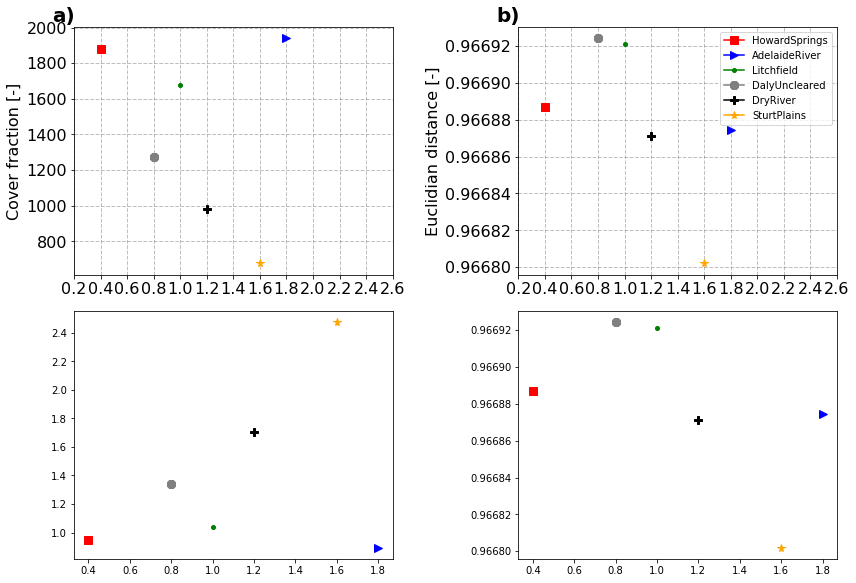

In [73]:
#plot parameters
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]

cpcff_str = map(str, np.round(cpcff_vals,1) ) 
cpcff_str = list(cpcff_str)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

symbols = ['s', '>', '.','8', 'P','*']
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8)) 
ax = axes.flat

ibasin = 0

for site in study_sites:


    ax[0].plot(cpcff_best[ibasin], prec_all[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
    ax[1].plot(cpcff_best[ibasin], seas[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
    ax[2].plot(cpcff_best[ibasin], aridity[ibasin][1], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
    ax[3].plot(cpcff_best[ibasin], drydur[ibasin], marker=symbols[ibasin], color=colors[ibasin] , markersize=8, label=site)     
    ibasin = ibasin + 1


ax[0].set_ylabel("Cover fraction [-]", size=16 )  
#ax[0].set_ylim( 0, 1  ) 
#ax[0].set_xlim( 0, 2.8  )    

#ax[0].legend(prop={'size':10})

ax[0].text(-0.07, 1.02, "a)", transform=ax[0].transAxes, 
            size=20, weight='bold')
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].set_xticks(cpcff_vals)
ax[0].set_xticklabels(cpcff_str)
ax[0].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)


ax[1].set_ylabel("Euclidian distance [-]", size = 16 )  
#ax[1].set_xlim( 0, 2.8  )    

ax[1].legend(prop={'size':10})
ax[1].text(-0.07, 1.02, "b)", transform=ax[1].transAxes, 
            size=20, weight='bold')
ax[1].tick_params(axis='both', which='major', labelsize=16)
ax[1].set_xticks(cpcff_vals)
ax[1].set_xticklabels(cpcff_str)
ax[1].grid(color='gray', linestyle='--', linewidth=1, alpha=0.5)
plt.tight_layout()
    
plt.show()




In [70]:
aridity[0][0]

0.9489800996835616

## Influence on fluxes

<Figure size 1280x400 with 0 Axes>

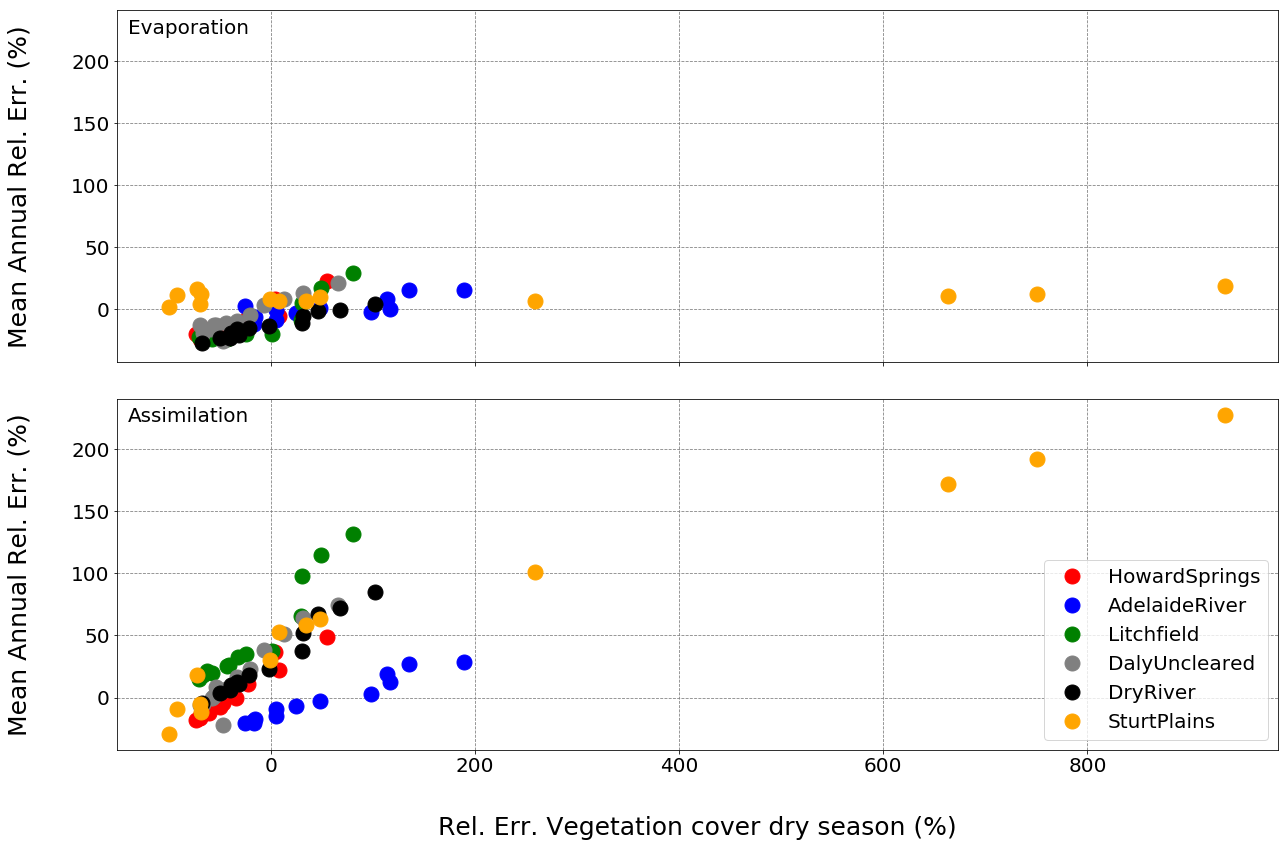

Missing files:  0


In [25]:
#load data
cpcff_vals = np.arange(0.2,2.8, 0.2)
study_sites = ["HowardSprings", "AdelaideRiver", "Litchfield", "DalyUncleared", "DryRiver", "SturtPlains" ]
colors = ['red', 'blue', 'green', 'gray', 'black', 'orange']

labels = ''.join(str(e) for e in cpcff_vals)
labels = map(str, np.round(cpcff_vals,1) ) 
labels = list(labels)

cai_fpar = [0.3971929824561404, #HowardSprings
0.20771929824561405, #AdelaideRiver
0.32000000000000006, #Litchfield
0.37473684210526315, #DalyUncleared
0.26616541353383455, #DryRiver
0.07443609022556391 #SturtPlains
] 

err = np.zeros((len(cpcff_vals),6))
ED = np.zeros((len(cpcff_vals)))

fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=2, ncols=1, figsize=(18, 12), sharex=True, sharey=True)   


i = 0

skipped = 0
#loop over all sites
for site in study_sites:

    loc = 1
    i_cpcff = 0
    NCPmax = 0  

    #loop over all cpcff-values for the free-draining case
    for label in labels:   
        
        try:
            ebest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/evap_beststats.txt") #mm/d

            assbest_stats = np.genfromtxt("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt") #mm/d        

            if(cpcff == "1.0"):
                params = np.loadtxt("../../data/VOM_output/"+  site  +"/freedrainage_cpcff" + label +
                      "/sce_best/pars.txt")
            else:
                params = np.loadtxt("../../work/"+  site  +"/freedrainage_cpcff" + label +
                      "/best/input/pars.txt")

            cai = params[4]
            err[i_cpcff, i] = 100*(cai - cai_fpar[i])/cai_fpar[i]
            
           
                
            if(loc  == 1):
                ax[0].plot(err[i_cpcff, i], ebest_stats[1]*100, 'o', color=colors[i] , markersize=15, label=site ) 
                ax[1].plot(err[i_cpcff, i], assbest_stats[1]*100, 'o', color=colors[i] , markersize=15, label=site ) 
            else:
                ax[0].plot(err[i_cpcff, i], ebest_stats[1]*100, 'o', color=colors[i], markersize=15 ) 
                ax[1].plot(err[i_cpcff, i], assbest_stats[1]*100, 'o', color=colors[i] , markersize=15 ) 
        
        except IOError:
            skipped = skipped + 1 
            print("../../data/VOM_output/" + 
             site + "/freedrainage_cpcff" + label + "/sce_stats_best/ass_beststats.txt')")

       
        i_cpcff = i_cpcff + 1        
        loc = loc + 2
        
       
    i = i +1

ax[0].grid(b=True, which='major', color='grey', linestyle='--')
ax[1].grid(b=True, which='major', color='grey', linestyle='--')

for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
ax[0].text(0.01, 0.95, "Evaporation", ha='left', va='center', transform=ax[0].transAxes, fontsize=20)
ax[1].text(0.01, 0.95, "Assimilation", ha='left', va='center', transform=ax[1].transAxes, fontsize=20)

ax[1].set_xlabel(r'Rel. Err. Vegetation cover dry season (%)', size = 25, labelpad=40)
ax[0].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)
ax[1].set_ylabel('Mean Annual Rel. Err. (%)', size = 25, labelpad=40)

plt.legend(loc='lower right', fontsize = 20)
plt.tight_layout()
plt.show()

    
print("Missing files: ", + skipped)

The relative errors of the mean annual fluxes versus the relative errors for the projective cover, for the different values of the costfactor cpcff. Generally, a larger error in vegetation cover during the dry season also means a large error in the resulting fluxes. 